### Our goal is to build a predictive model which will Identify the Flower Species.

### Understanding our dataset

Here we got the collection of few species of Iris Flower. Our aim is to build a Machine Learning Model which will classify the different Species of Iris FLower. The dataset has three different species of the Flower and its Dimensions i.e. lengths and width of its petal and sepal. The dataset contains 150 Dimensions of respective Species as its feature.

Now these data will be our labeled trainig set. And we are going to use these features to train our Machine Learning Model, which is again will help to descriminate the difference between each of the Species. 

#### Import Required Libraries

In [23]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

#Here we are importing various number of classification algorithms
##just when we find the respetive algorithm is giving satisfatory result than other 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
#importing splitting model
from sklearn.model_selection import train_test_split
#for evaluating purpose
from sklearn.metrics import accuracy_score
#Label Encoder
from sklearn.preprocessing import LabelEncoder

In [24]:
#Load your Dataset and check the first 10 rows
df = pd.read_csv('Iris.csv')
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [25]:
#Printing shape of the dataset
print('Shape of the Dataset is :',df.shape)

Shape of the Dataset is : (150, 6)


In [26]:
#df.info shows you the statistics of your dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [27]:
#Removing unwanted column
df.drop("Id", axis=1, inplace = True)
df.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


#### Now the dataframe looks more clean without unwanted extra column.

## Visualization

Below you can see a Scatter plot ,here the points are represented individually with three colored dot of respective Species, so we can see the difference among their dimensions like their Sepal-length/width and Petal-Length/width.

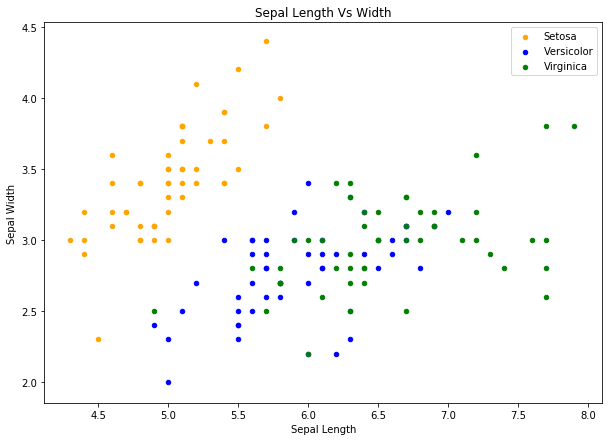

In [7]:
fig = df[df.Species == 'Iris-setosa'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='orange', label='Setosa')
df[df.Species == 'Iris-versicolor'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='blue', label='Versicolor', ax=fig)
df[df.Species == 'Iris-virginica'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='green', label='Virginica', ax=fig)

fig.set_xlabel('Sepal Length')
fig.set_ylabel('Sepal Width')
fig.set_title('Sepal Length Vs Width')

fig=plt.gcf()
fig.set_size_inches(10, 7)
plt.show()

/home/nikhil/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


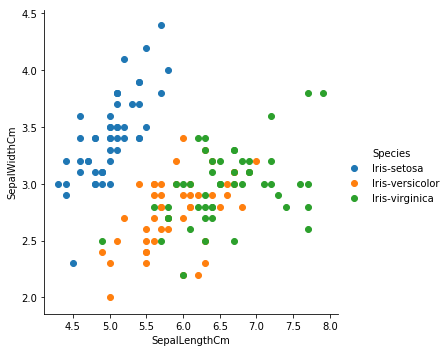

In [8]:
sb.FacetGrid(df, hue='Species', size=5)\
   .map(plt.scatter, 'SepalLengthCm', 'SepalWidthCm')\
   .add_legend()

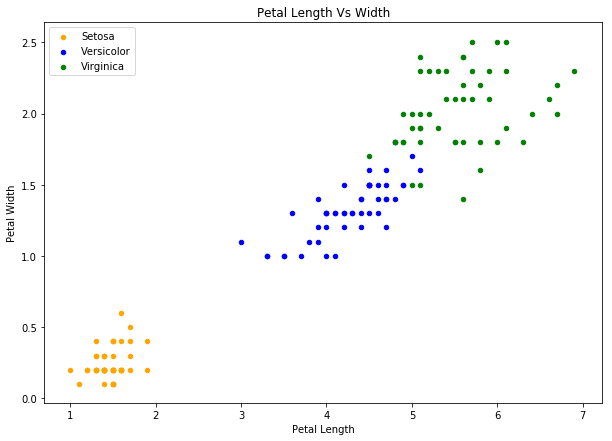

In [9]:
fig = df[df.Species == 'Iris-setosa'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='orange', label='Setosa')
df[df.Species == 'Iris-versicolor'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='blue', label='Versicolor', ax=fig)
df[df.Species == 'Iris-virginica'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='green', label='Virginica', ax=fig)

fig.set_xlabel('Petal Length')
fig.set_ylabel('Petal Width')
fig.set_title('Petal Length Vs Width')

fig=plt.gcf()
fig.set_size_inches(10, 7)
plt.show()

Here we are plotting a bar plot for the dimensions. So we can have a brief idea of its distrubution of dimensions.

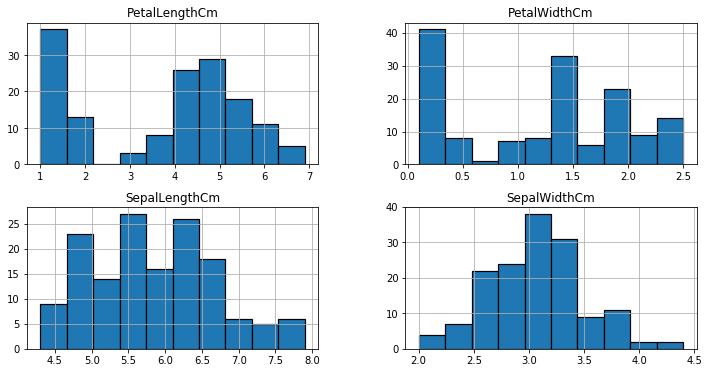

In [10]:
df.hist(edgecolor='black', linewidth=1.2)
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.show()

Here we are plotting Violin-Plot. In this plotting you can that every Species have its own unique shape and distrubution over length/width of Sepals and Petals.

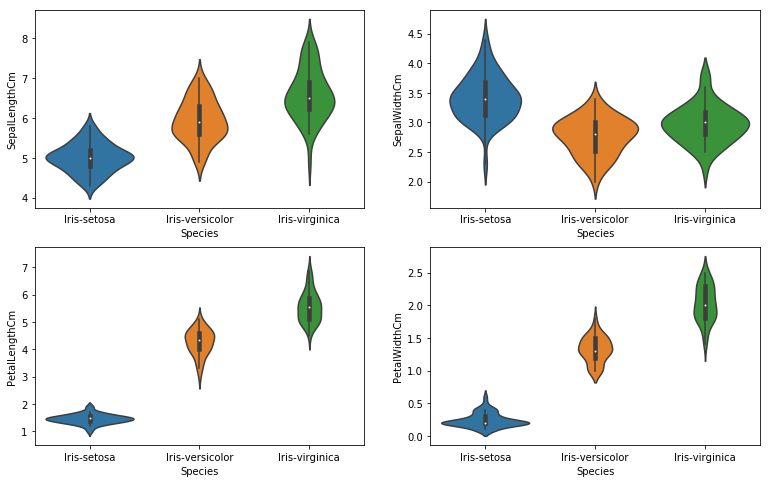

In [11]:
plt.figure(figsize=(13,8))
plt.subplot(2,2,1)
sb.violinplot(x='Species', y = 'SepalLengthCm', data=df)
plt.subplot(2,2,2)
sb.violinplot(x='Species', y = 'SepalWidthCm', data=df)

plt.subplot(2,2,3)
sb.violinplot(x='Species', y = 'PetalLengthCm', data=df)
plt.subplot(2,2,4)
sb.violinplot(x='Species', y = 'PetalWidthCm', data=df)

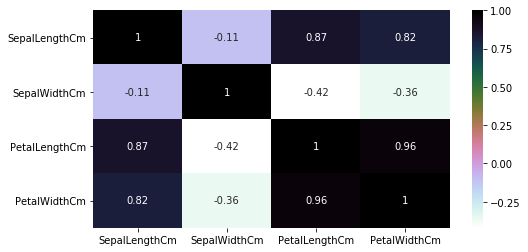

In [12]:
plt.figure(figsize=(8,4))
sb.heatmap(df.corr(), annot=True, cmap='cubehelix_r') 
plt.show()

#### Correlation is very important part of the visualization ,if many of the features are highly correlated, then training an algorithm with all the featues will reduce the accuracy, so it feature selction become more important before you train your data.

## Splitting The Dataset into Training and Testing Data

In [13]:
##Again checking the shape of the dataframe
df.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


#### Lets Encode the our expeted output with `LabelEncoder`

In [14]:
encode = LabelEncoder()
df['Species'] = encode.fit_transform(df['Species'])

In [15]:
df.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


#### Now we can see the dataframe is looking more learnable than berfore after `Encoding`  the expected output ,now we can go forward and train our model.

In [16]:
x = df.iloc[:,[0,1,2,3]].values
y = df.iloc[:,4].values

In [17]:
x_train , x_test , y_train , y_test = train_test_split(x, y,test_size = 0.3)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


#### Now lets load some Models as we already imported them in our algorithm packages

In [18]:
models = [LogisticRegression(),KNeighborsClassifier(),SVC(),GaussianNB(),DecisionTreeClassifier()]
for model in models:
    model.fit(x_train,y_train)
    prediction = model.predict(x_test)
    accuracy = accuracy_score(y_test, prediction)
    print("The {} model accuracy is".format(model),accuracy,'\n')

The LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False) model accuracy is 0.8666666666666667 

The KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform') model accuracy is 0.9555555555555556 

The SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False) model accuracy is 0.9555555555555556 

The GaussianNB(priors=None, var_smoothing=1e-09) model accuracy is 0.9111111111111111 

The DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_l

/home/nikhil/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/nikhil/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/nikhil/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


From these predictions we can come to a conclusion that most of the Classifier is giving outmost accuracy,so for one has to choose I will go with`KNeighborsClassifier`.

#### So again Load a model i.e. `KNeighborsClassifier` and set as your final Classifier.

In [20]:
final_model = KNeighborsClassifier()
final_model.fit(x_train,y_train)
final_pred = final_model.predict(x_test)
final_acc = accuracy_score(y_test, final_pred)
print("The {} model accuracy is".format(final_model),final_acc)

The KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform') model accuracy is 0.9555555555555556
